# Kandinsky 3.0

Kandinsky 3.0 is an open-source text-to-image diffusion model built upon the Kandinsky2-x model family. In comparison to its predecessors, Kandinsky 3.0 incorporates more data and specifically related to Russian culture, which allows to generate pictures related to Russin culture. Furthermore, enhancements have been made to the text understanding and visual quality of the model, achieved by increasing the size of the text encoder and Diffusion U-Net models, respectively.

Source: https://huggingface.co/kandinsky-community/kandinsky-3

In [1]:
import platform

def is_mac():
    return platform.system() == "Darwin"

if is_mac():
    %pip install --pre torch --extra-index-url https://download.pytorch.org/whl/nightly/cpu
else:
    %pip install torch

%pip install diffusers
%pip install invisible_watermark transformers accelerate safetensors
%pip install sentencepiece


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/nightly/cpu
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Setup model

In [3]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained(
    "kandinsky-community/kandinsky-3",
    variant="fp16",
    torch_dtype=torch.float16
)

if is_mac():
    print("Prepare pipe for MPS")
    import os
    os.environ["PYTORCH_MPS_HIGH_WATERMARK_RATIO"] = "0.0"
    pipe.to("mps")
    pipe.enable_attention_slicing()
else:
    print("Prepare pipe for CUDA")
    pipe.to("cuda")

generator = torch.Generator(device="mps" if is_mac() else "cuda").manual_seed(0)

Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00,  5.12it/s]


Offloading to CPU


Generate image

In [5]:
prompt = "A cute monkey hanging upside down"
image = pipe(prompt, num_inference_steps=25, generator=generator).images[0]

100%|██████████| 25/25 [03:12<00:00,  7.68s/it]


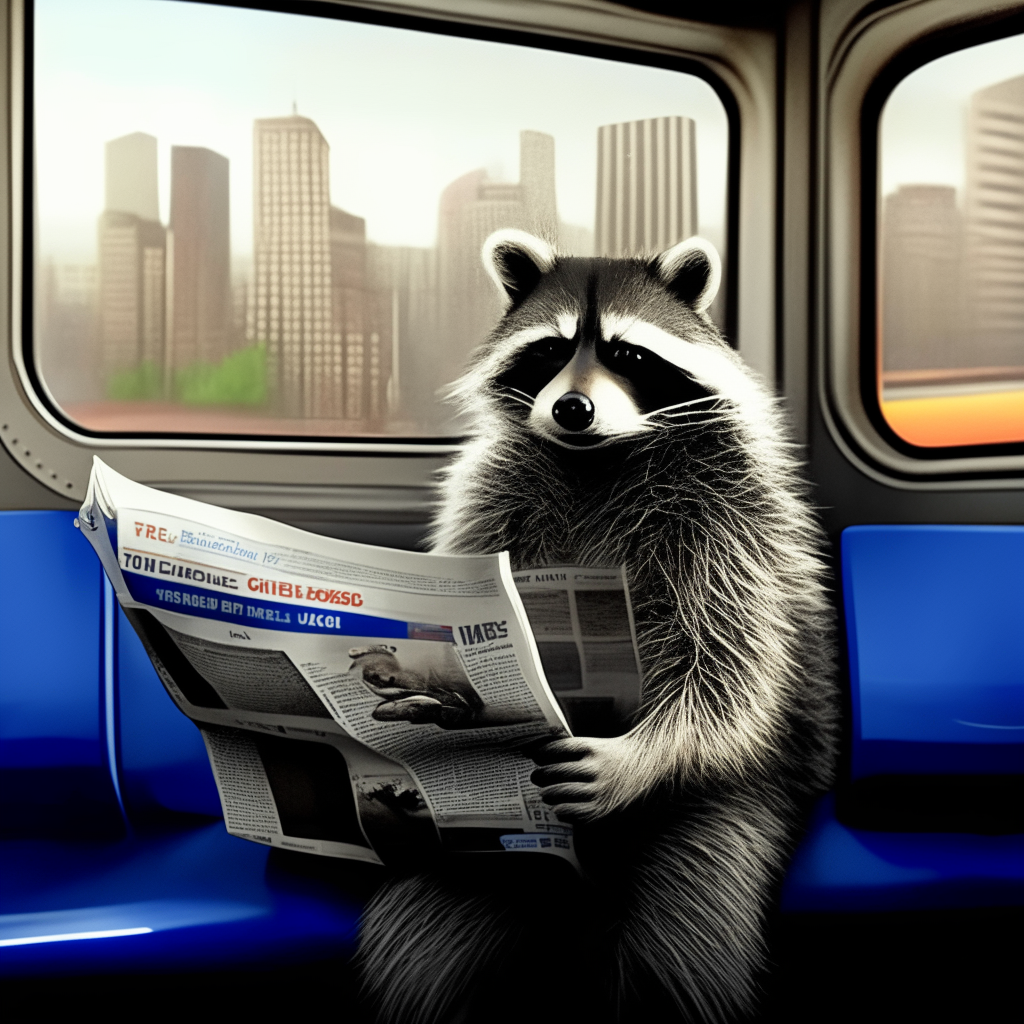

In [7]:
image